In [13]:
# import libraries for data analysis
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings(action='ignore')

In [14]:
df= pd.read_csv('births.csv')

In [15]:
df.columns

Index(['year', 'month', 'day', 'gender', 'births'], dtype='object')

In [16]:
df.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


# Q1

In [17]:
# Extract the year column as a new DataFrame column
df['decade'] = (df['year'] // 10) * 10
# Print the first few rows of the DataFrame
df

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960
...,...,...,...,...,...,...
15542,2008,10,NaN,M,183219,2000
15543,2008,11,NaN,F,158939,2000
15544,2008,11,NaN,M,165468,2000
15545,2008,12,NaN,F,173215,2000


# Q2

In [18]:
df.describe()

,year,month,day,births,decade
count,15547.000000,15547.000000,15067.000000,15547.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561,1974.544285
std,6.728340,3.449632,15.284034,28552.465810,6.789583
min,1969.000000,1.000000,1.000000,1.000000,1960.000000
25%,1974.000000,4.000000,8.000000,4358.000000,1970.000000
50%,1979.000000,7.000000,16.000000,4814.000000,1970.000000
75%,1984.000000,10.000000,24.000000,5289.500000,1980.000000
max,2008.000000,12.000000,99.000000,199622.000000,2000.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
 5   decade  15547 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 728.9+ KB


# Q3

In [20]:
df.isna().sum()

year        0
month       0
day       480
gender      0
births      0
decade      0
dtype: int64

# Q4

Text(0.5, 1.0, 'Trend of male & female births every decade')

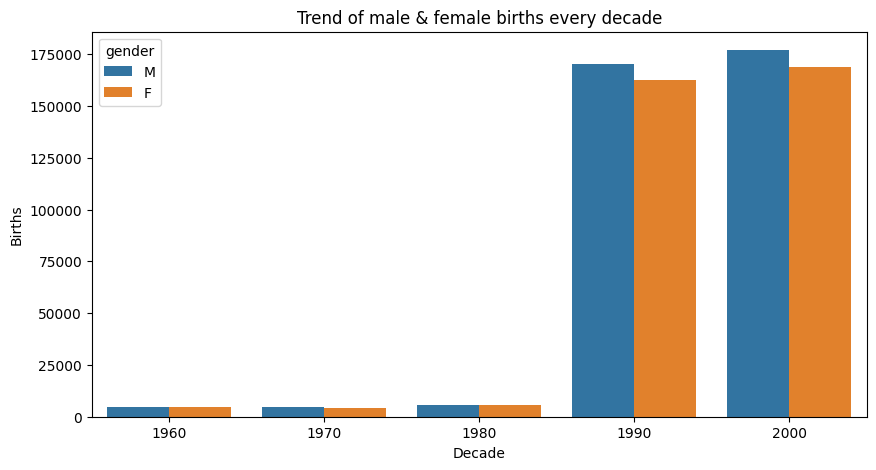

In [26]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='decade',y='births', hue='gender', hue_order=['M', 'F'],ci=False)
plt.xlabel('Decade')
plt.ylabel('Births')
plt.title('Trend of male & female births every decade')

# Q5

In [30]:
mean_value = df.births.mean()
std_value= df.births.std()

lower_bound = mean_value - 5 * std_value
upper_bound = mean_value + 5 * std_value

df_no_outliers = df[(df['births']>=lower_bound) & (df['births']<= upper_bound)]

rows_removed = df.shape[0] - df_no_outliers.shape[0]
print(f"Number of rows removed: {rows_removed}")

Number of rows removed: 461


# Q6

# Q7

In [64]:
month_data = df.groupby('month')['births'].sum().reset_index()
month_data

,month,births
0,1,5759165
1,2,5362946
2,3,5868140
3,4,5560903
4,5,5785220
5,6,5758696
6,7,6220295
7,8,6309764
8,9,6206173
9,10,6055372


In [65]:
day_data = df.groupby('day')['births'].sum().reset_index()
day_data

,day,births
0,1,2286854
1,2,2303168
2,3,2309087
3,4,2286588
4,5,2296951
5,6,2308073
6,7,2314081
7,8,2322376
8,9,2315055
9,10,2327197


In [63]:
daily_births = df.groupby(['month', 'day'])['births'].sum().reset_index()
print(daily_births)

     month  day  births
0        1    1  160369
1        1    2  169896
2        1    3  180036
3        1    4  182854
4        1    5  184145
..     ...  ...     ...
367     12   27  194006
368     12   28  201768
369     12   29  204806
370     12   30  206894
371     12   31  194368

[372 rows x 3 columns]


# Q8

In [71]:
avg_birth_rate= df.groupby(['month', 'day'])['births'].mean().reset_index()


,month,day,births
0,1,1,4009.225
1,1,2,4247.400
2,1,3,4500.900
3,1,4,4571.350
4,1,5,4603.625
...,...,...,...
367,12,27,4850.150
368,12,28,5044.200
369,12,29,5120.150
370,12,30,5172.350
